In [1]:
!unzip /content/shapes_dataset.zip

Archive:  /content/shapes_dataset.zip
   creating: shapes_dataset/
   creating: shapes_dataset/circle/
  inflating: shapes_dataset/circle/download (1).jpg  
  inflating: shapes_dataset/circle/download (1).png  
  inflating: shapes_dataset/circle/download (10).png  
  inflating: shapes_dataset/circle/download (2).jpg  
  inflating: shapes_dataset/circle/download (2).png  
  inflating: shapes_dataset/circle/download (3).jpg  
  inflating: shapes_dataset/circle/download (3).png  
  inflating: shapes_dataset/circle/download (4).png  
  inflating: shapes_dataset/circle/download (5).png  
  inflating: shapes_dataset/circle/download (6).png  
  inflating: shapes_dataset/circle/download (7).png  
  inflating: shapes_dataset/circle/download (8).png  
  inflating: shapes_dataset/circle/download (9).png  
  inflating: shapes_dataset/circle/download.jpg  
  inflating: shapes_dataset/circle/download.png  
  inflating: shapes_dataset/circle/images (1).jpg  
  inflating: shapes_dataset/circle/images.

In [3]:
# Install necessary libraries
!pip install tensorflow matplotlib numpy ipywidgets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import os
from random import choice
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display


dataset_dir = '/content/shapes_dataset'

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


v 2

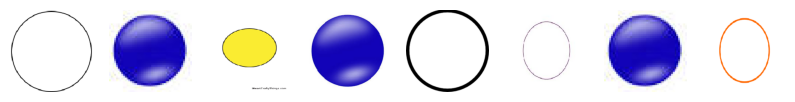

How many circles are in the images above?


Correct! There were 8 shapes.
Current score: 1


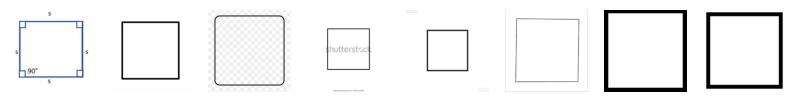

How many squares are in the images above?


Wrong! The correct answer was: 8
Current score: 1


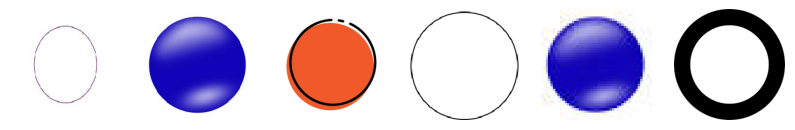

How many circles are in the images above?


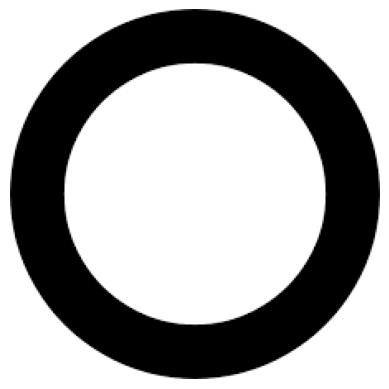

Guess the shape!


Correct! The shape is: circle
Current score: 2


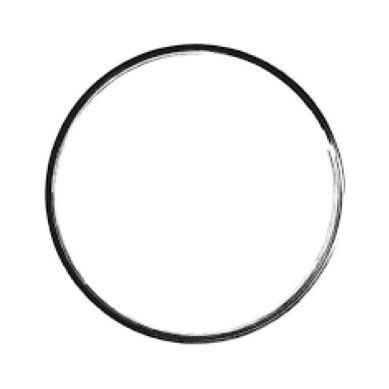

Guess the shape!


Correct! The shape is: circle
Current score: 3


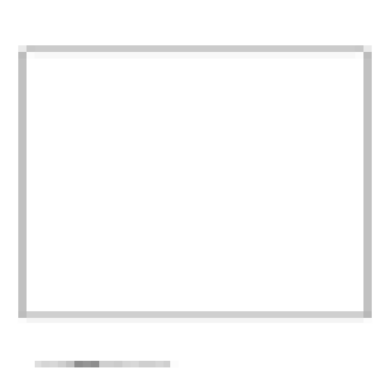

Guess the shape!


Correct! The shape is: square
Current score: 4


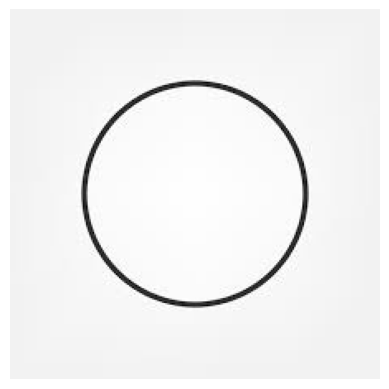

Guess the shape!


In [21]:
import random

score = 0

dataset_dir = '/content/shapes_dataset'

shapes_folders = ['circle', 'triangle', 'square']


def load_random_images_from_folder(folder, num_images=3):
    shape_folder_path = os.path.join(dataset_dir, folder)
    image_files = [f for f in os.listdir(shape_folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    if len(image_files) == 0:
        raise ValueError(f"No images found in the {folder} folder.")


    selected_files = random.sample(image_files, num_images)
    images = []
    for file in selected_files:
        image_path = os.path.join(shape_folder_path, file)
        img = image.load_img(image_path, target_size=(224, 224))
        images.append(img)

    return images, selected_files


def display_counting_question():
    folder = choice(shapes_folders)
    num_images = random.randint(1, 10)
    images, selected_files = load_random_images_from_folder(folder, num_images=num_images)


    plt.figure(figsize=(10, 4))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


    print(f"How many {folder}s are in the images above?")


    correct_answer = len(images)
    options = set([correct_answer] + [random.randint(1, 10) for _ in range(3)])


    while len(options) < 4:
        options.add(random.randint(1, 10))

    options = list(options)
    random.shuffle(options)


    buttons = []
    for option in options:
        button = widgets.Button(description=str(option))
        button.on_click(lambda b, option=option, correct_answer=correct_answer: handle_counting_answer(option, correct_answer))
        buttons.append(button)

    display(widgets.HBox(buttons))


def handle_counting_answer(option, correct_answer):
    global score

    if option == correct_answer:
        score += 1
        print(f"Correct! There were {correct_answer} shapes.")
    else:
        print(f"Wrong! The correct answer was: {correct_answer}")

    print(f"Current score: {score}")


    display_counting_question()


def load_random_image(dataset_dir):
    folder = choice(shapes_folders)
    shape_folder_path = os.path.join(dataset_dir, folder)
    image_files = [f for f in os.listdir(shape_folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    if len(image_files) == 0:
        raise ValueError(f"No images found in the {folder} folder.")

    image_file = choice(image_files)
    image_path = os.path.join(shape_folder_path, image_file)
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    return img, img_array, image_file, folder


def predict_shape(model, img_array):
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds


def handle_button_click(option, actual_shape):
    global score

    if option == actual_shape:
        score += 1
        print(f"Correct! The shape is: {actual_shape}")
    else:
        print(f"Wrong! The shape was: {actual_shape}")

    print(f"Current score: {score}")
    display_shape_question()


def display_shape_question():
    img, img_array, image_file, actual_shape = load_random_image(dataset_dir)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f"Guess the shape!")

    options = ['circle', 'triangle', 'square']
    buttons = []

    for option in options:
        button = widgets.Button(description=option.capitalize())
        button.on_click(lambda b, option=option, actual_shape=actual_shape: handle_button_click(option, actual_shape))
        buttons.append(button)

    display(widgets.HBox(buttons))


def handle_main_menu(option):
    if option == "Count Shapes":
        display_counting_question()
    elif option == "Identify Shape":
        display_shape_question()


def handle_quit(option):
    print("Thanks for playing! Exiting the game.")

    for widget in widgets.Widget.widgets:
        widget.close()

# Main menu: Create a button to choose between "Count Shapes" or "Identify Shape" and "Quit"
def display_main_menu():
    buttons = [
        widgets.Button(description="Count Shapes"),
        widgets.Button(description="Identify Shape"),
        widgets.Button(description="Quit")
    ]

    for button in buttons:
        if button.description == "Quit":
            button.on_click(lambda b, option=button.description: handle_quit(option))
        else:
            button.on_click(lambda b, option=button.description: handle_main_menu(option))

    display(widgets.HBox(buttons))

# Show the main menu
display_main_menu()
